In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
  

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns 

from random import randrange,uniform


In [71]:
#set working directory
os.chdir("H:\Data Science\Project1")

In [3]:
os.getcwd()

'H:\\Data Science\\Project1'

In [73]:
#load the data
loan_data=pd.read_csv("H:/Data Science/Project1/bank-loan.csv")

In [74]:
loan_data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [75]:
#Exploratory data analysis
#thera are 2 categorical data converting them from numeric to factor type
loan_data['ed'] = loan_data['ed'].astype('category')
loan_data['default'] = loan_data['default'].astype('category')


In [76]:
#####Missing value analysis
missing_val=pd.DataFrame(loan_data.isnull().sum())

In [77]:
###since there are missing value in our target variable we cannot fill it we have to drop certain rows for which value is missing
loan_data=loan_data.dropna()

In [78]:
loan_data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [ ]:
###########################OUTLIER ANALYSIS


In [79]:
###storing continuous variable in cnames
cnames=["age","employ","address","income","debtinc","creddebt","othdebt"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1890c5f2348>,
 'caps': [<matplotlib.lines.Line2D at 0x1890c5f2fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1890c5ebb08>],
 'medians': [<matplotlib.lines.Line2D at 0x1890c5f7c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1890c5f7d48>],
 'means': []}

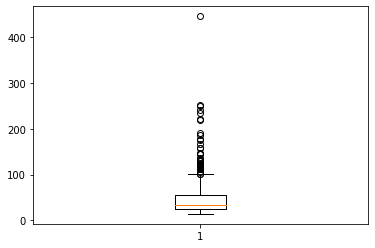

In [80]:
#plot boxplot to visualise outliers
%matplotlib inline
plt.boxplot(loan_data['income'])

In [81]:
#detect and delete outliers in data
for i in cnames:
    print(i)
    q75,q25=np.percentile(loan_data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    loan_data=loan_data.drop(loan_data[loan_data.loc[:,i]<min].index)
    loan_data=loan_data.drop(loan_data[loan_data.loc[:,i]>max].index)


age
employ
address
income
debtinc
creddebt
othdebt


In [82]:
loan_data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [56]:
#######Fature selection
#correlation analysis
#correlation plot
df_corr=loan_data.loc[:,cnames]

In [57]:
df_corr.shape

(574, 7)

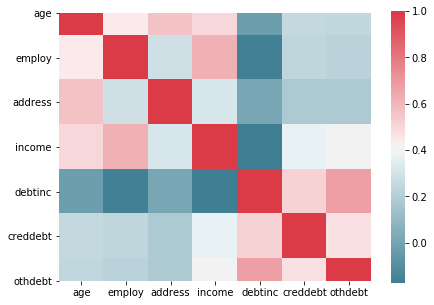

In [58]:
#set hwight and width of a plot on which we want to draw the correlation and analysis
f,ax=plt.subplots(figsize=(7,5))
#generate corr matrix
#extreme red highly correlated data like wise etc
corr=df_corr.corr()
#plot using seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [59]:
#chisquare test for dependent variable
#"default" is the variable with wich we are comapre all the below if p <0.05 then they are related with each other and we have to consider both otherwise ew eill rejecyt one
cat_names=["ed"]

In [60]:
#loop for chi ssquare test
#after running this we will reject  emp_var_rate,day_of_week,loan,housing     because p >0.05 for both
for i in cat_names:
    print(i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(loan_data['default'],loan_data[i]))
    print(p)


ed
0.04116387566728692


In [ ]:
################################FEATURE SCALING############################################################

(array([305.,   0.,   0.,   0., 153.,   0.,   0.,   0.,  55.,   0.,   0.,
          0.,  30.,   0.,   0.,   0.,   2.]),
 array([1.        , 1.23529412, 1.47058824, 1.70588235, 1.94117647,
        2.17647059, 2.41176471, 2.64705882, 2.88235294, 3.11764706,
        3.35294118, 3.58823529, 3.82352941, 4.05882353, 4.29411765,
        4.52941176, 4.76470588, 5.        ]),
 <a list of 17 Patch objects>)

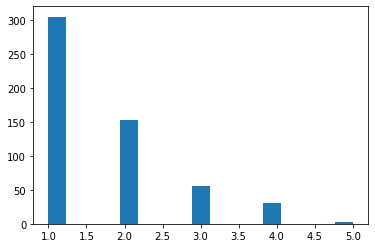

In [38]:
#Normality check
%matplotlib inline
plt.hist(loan_data['ed'],bins='auto')

In [85]:
###data is left squed so we will go with the normalization
for i in cnames:
    print(i)
    loan_data[i] = (loan_data[i] - loan_data[i].min())/(loan_data[i].max() - loan_data[i].min())


age
employ
address
income
debtinc
creddebt
othdebt


In [86]:
loan_data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,0.200000,1,0.434783,0.24,0.226667,0.619048,0.388171,0.695971,0.0
2,0.571429,1,0.652174,0.56,0.546667,0.186813,0.242697,0.373629,0.0
4,0.114286,2,0.086957,0.00,0.186667,0.619048,0.510394,0.529821,1.0
5,0.600000,2,0.217391,0.20,0.146667,0.358974,0.109511,0.371584,0.0
7,0.657143,1,0.521739,0.44,0.320000,0.117216,0.033599,0.210069,0.0
...,...,...,...,...,...,...,...,...,...
695,0.457143,2,0.260870,0.60,0.173333,0.153846,0.071962,0.164412,1.0
696,0.257143,2,0.260870,0.16,0.093333,0.406593,0.102841,0.351912,0.0
697,0.371429,1,0.652174,0.12,0.240000,0.263736,0.137840,0.333476,0.0
698,0.714286,1,0.826087,0.88,0.840000,0.293040,0.658469,0.724933,0.0


In [87]:

#################algo implementation

In [88]:
loan_data


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,0.200000,1,0.434783,0.24,0.226667,0.619048,0.388171,0.695971,0.0
2,0.571429,1,0.652174,0.56,0.546667,0.186813,0.242697,0.373629,0.0
4,0.114286,2,0.086957,0.00,0.186667,0.619048,0.510394,0.529821,1.0
5,0.600000,2,0.217391,0.20,0.146667,0.358974,0.109511,0.371584,0.0
7,0.657143,1,0.521739,0.44,0.320000,0.117216,0.033599,0.210069,0.0
...,...,...,...,...,...,...,...,...,...
695,0.457143,2,0.260870,0.60,0.173333,0.153846,0.071962,0.164412,1.0
696,0.257143,2,0.260870,0.16,0.093333,0.406593,0.102841,0.351912,0.0
697,0.371429,1,0.652174,0.12,0.240000,0.263736,0.137840,0.333476,0.0
698,0.714286,1,0.826087,0.88,0.840000,0.293040,0.658469,0.724933,0.0


In [100]:
#create logistic variable first.save target variable first
loan_data_logit=pd.DataFrame(loan_data['default'])

In [101]:
#add continuous variables i.e cnames
loan_data_logit=loan_data_logit.join(loan_data[cnames])

In [103]:
for i in cat_names:
    temp=pd.get_dummies(loan_data[i],prefix=i)
    loan_data_logit=loan_data_logit.join(temp)

In [104]:
loan_data_logit

,default,age,employ,address,income,debtinc,creddebt,othdebt,ed_1,ed_2,ed_3,ed_4,ed_5
1,0.0,0.200000,0.434783,0.24,0.226667,0.619048,0.388171,0.695971,1,0,0,0,0
2,0.0,0.571429,0.652174,0.56,0.546667,0.186813,0.242697,0.373629,1,0,0,0,0
4,1.0,0.114286,0.086957,0.00,0.186667,0.619048,0.510394,0.529821,0,1,0,0,0
5,0.0,0.600000,0.217391,0.20,0.146667,0.358974,0.109511,0.371584,0,1,0,0,0
7,0.0,0.657143,0.521739,0.44,0.320000,0.117216,0.033599,0.210069,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,0.457143,0.260870,0.60,0.173333,0.153846,0.071962,0.164412,0,1,0,0,0
696,0.0,0.257143,0.260870,0.16,0.093333,0.406593,0.102841,0.351912,0,1,0,0,0
697,0.0,0.371429,0.652174,0.12,0.240000,0.263736,0.137840,0.333476,1,0,0,0,0
698,0.0,0.714286,0.826087,0.88,0.840000,0.293040,0.658469,0.724933,1,0,0,0,0


In [105]:
#dividing data into train and test 80% in train  and 20 % in test
sample_index=np.random.rand(len(loan_data_logit))<0.8
train=loan_data_logit[sample_index]
test=loan_data_logit[~sample_index]

In [113]:
#taking column name of all independent variable in sperate  variable
train_cols=train.columns[1:13]

In [114]:
train_cols

Index(['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt',
       'ed_1', 'ed_2', 'ed_3', 'ed_4', 'ed_5'],
      dtype='object')

In [115]:
#build logistic regression model
import statsmodels.api as sm
logit=sm.Logit(train['default'],train[train_cols]).fit()

         Current function value: 0.421943
         Iterations: 35


C:\Users\rishabh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [116]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  444
Model:                          Logit   Df Residuals:                      432
Method:                           MLE   Df Model:                           11
Date:                Tue, 31 Dec 2019   Pseudo R-squ.:                  0.2395
Time:                        00:03:10   Log-Likelihood:                -187.34
converged:                      False   LL-Null:                       -246.33
Covariance Type:            nonrobust   LLR p-value:                 4.643e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.7939      0.778      1.021      0.307      -0.731       2.319
employ        -5.0364      1.026     -4.910      0.000      -7.047      -3.026
address       -2.0209      0.756     -2.674      0.008      -3.502      -0.539
income        -0.8568      1.678     -0.511      0.610      -4.145       2.431
debtinc        1.7618      1.779      0.990      0.322      -1.726       5.250
creddebt       2.7160      0.968      2.805      0.005       0.818       4.614
othdebt        0.0061      1.409      0.004      0.997      -2.755       2.767
ed_1          -0.9999      0.466     -2.147      0.032      -1.913      -0.087
ed_2          -0.7417      0.478     -1.551      0.121      -1.679       0.196
ed_3          -1.1362      0.573     -1.983      0.047      -2.259      -0.013
ed_4          -1.3221      0.718     -1.841      0.066      -2.730       0.086
ed_5          22.1935   5.76e+04      0.000      1.000   -1.13e+05    1.13e+05
==============================================================================
"""

In [117]:
#predict test data to look accuracy of our model
test['Actual_prob']=logit.predict(test[train_cols])

C:\Users\rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
test.head()

,default,age,employ,address,income,debtinc,creddebt,othdebt,ed_1,ed_2,ed_3,ed_4,ed_5,Actual_prob,ActualVal
10,0.0,0.200000,0.000000,0.04,0.026667,0.047619,0.049097,0.007725,1,0,0,0,0,0.325739,0
13,0.0,0.485714,0.260870,0.36,0.200000,0.582418,0.489833,0.521820,1,0,0,0,0,0.385242,0
21,0.0,0.771429,0.739130,0.84,0.386667,0.190476,0.165516,0.312310,1,0,0,0,0,0.004717,0
22,0.0,0.228571,0.130435,0.24,0.160000,0.351648,0.120691,0.373537,1,0,0,0,0,0.240879,0
25,0.0,0.142857,0.000000,0.08,0.240000,0.630037,0.611777,0.606413,0,0,0,1,0,0.768399,1


In [120]:
#convert these probabilities into target class yes and no
test['ActualVal']=1
test.loc[test.Actual_prob<0.5,'ActualVal']=0

C:\Users\rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rishabh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [122]:
#Build confusion Matrix
CM=pd.crosstab(test['default'],test['ActualVal'])
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [123]:
#accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7722772277227723

In [124]:
#FNR
FN/(FN+TP)

0.6923076923076923

In [ ]:
###ACC=77.27
####FNR=69.23

In [125]:
###############NAIVE BAYES

In [ ]:
#startified sampling
from sklearn.model_selection import train_test_split


In [134]:
#dividing the daata for train and test
#here we save the dependent variable in Y and all independent variable in X (0:8 menas it take upto 7 )
X=loan_data.values[:,0:8]
Y=loan_data.values[:,8]
Y=Y.astype('int')

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [136]:
#import library
from sklearn.naive_bayes import GaussianNB
#develop model
NB_model=GaussianNB().fit(X_train,y_train)

In [137]:
#predict test cases
NB_predictions=NB_model.predict(X_test)

In [188]:
#confusion_matrix
CM=pd.crosstab(y_test,NB_predictions)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
#accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7889908256880734

In [189]:
###FNR
FN/(FN+TP)

0.48

In [ ]:
########################KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier



In [147]:
KNN_model=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
KNN_Predictions=KNN_model.predict(X_test)
#Build confusion Matrix
CM=pd.crosstab(y_test,KNN_Predictions)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
#accuracy
(TP+TN)/(TP+TN+FP+FN)


0.6788990825688074

In [148]:
###FNR FOR N=1
FN/(FN+TP)

0.6

In [149]:
#####for n=3
KNN_model=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
KNN_Predictions=KNN_model.predict(X_test)
#Build confusion Matrix
CM=pd.crosstab(y_test,KNN_Predictions)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
#accuracy
(TP+TN)/(TP+TN+FP+FN)


0.7522935779816514

In [150]:
###FNR FOR N=3
FN/(FN+TP)

0.6

In [151]:
#####for n=5
KNN_model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
KNN_Predictions=KNN_model.predict(X_test)
#Build confusion Matrix
CM=pd.crosstab(y_test,KNN_Predictions)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
#accuracy
(TP+TN)/(TP+TN+FP+FN)


0.7614678899082569

In [152]:
###FNR FOR N=5
FN/(FN+TP)

0.6

In [161]:
#####for n=5
KNN_model=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
KNN_Predictions=KNN_model.predict(X_test)
#Build confusion Matrix
CM=pd.crosstab(y_test,KNN_Predictions)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
#accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7798165137614679

In [162]:
###FNR FOR N=7
FN/(FN+TP)

0.64

In [ ]:
###############################Decision tree

In [164]:
#load libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [165]:
#Decision tree
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [166]:
#predict new test cases
y_pred=clf.predict(X_test)

In [167]:
#remove the target variable
md=loan_data.drop(['default'],axis=1)

In [170]:
from sklearn.metrics import confusion_matrix
Cm=confusion_matrix(y_test,y_pred)

In [172]:
Cm

array([[60, 24],
       [15, 10]], dtype=int64)

In [173]:
#check accuracy 
#using build in function
accuracy_score(y_test,y_pred)*100

64.22018348623854

In [174]:
###FNR
15/25

0.6

In [ ]:
######################RANDOM FOREST


In [175]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train) #X_train=independent variable y_train=dependent variable

In [176]:
RF_predictions=RF_model.predict(X_test)

In [177]:
CM=pd.crosstab(y_test,RF_predictions)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [178]:
accuracy=(TP+TN)/(TN+FP+FN+TP)

In [179]:
accuracy

0.7155963302752294

In [181]:
####FNR
FN/(FN+TP)

0.72

In [ ]:
####ACC=71.55%
####FNR=72%

In [ ]:
###for n=500


In [182]:
RF_model=RandomForestClassifier(n_estimators=500).fit(X_train,y_train) #X_train=independent variable y_train=dependent variable
RF_predictions=RF_model.predict(X_test)
CM=pd.crosstab(y_test,RF_predictions)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [183]:
accuracy=(TP+TN)/(TN+FP+FN+TP)

In [184]:
accuracy

0.7614678899082569

In [186]:
###FNR FOR n=500
FN/(FN+TP)

0.68

In [187]:
#for n=700
RF_model=RandomForestClassifier(n_estimators=500).fit(X_train,y_train) #X_train=independent variable y_train=dependent variable
RF_predictions=RF_model.predict(X_test)
CM=pd.crosstab(y_test,RF_predictions)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
accuracy=(TP+TN)/(TN+FP+FN+TP)
accuracy

0.7522935779816514